In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/Users/mayurimamdi/Downloads/Heart_Disease_Prediction.csv")

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Age'].unique()

array([70, 67, 57, 64, 74, 65, 56, 59, 60, 63, 53, 44, 61, 71, 46, 40, 48,
       43, 47, 54, 51, 58, 66, 37, 50, 42, 62, 49, 52, 45, 41, 76, 39, 35,
       55, 34, 38, 69, 68, 77, 29])

In [8]:
df['Sex'].unique()

array([1, 0])

In [9]:
df['Chest pain type'].unique()

array([4, 3, 2, 1])

In [10]:
df['BP'].max()

np.int64(200)

In [11]:
df['BP'].min()

np.int64(94)

In [12]:
Range=df['BP'].max()-df['BP'].min()
Range

np.int64(106)

In [13]:
df['Cholesterol'].unique()

array([322, 564, 261, 263, 269, 177, 256, 239, 293, 407, 234, 226, 235,
       303, 149, 311, 203, 211, 199, 229, 245, 204, 288, 275, 243, 295,
       230, 265, 228, 215, 326, 200, 207, 273, 180, 222, 223, 209, 233,
       197, 218, 246, 225, 315, 205, 417, 195, 198, 166, 178, 249, 281,
       126, 305, 240, 276, 319, 242, 260, 354, 309, 208, 236, 270, 214,
       201, 244, 306, 221, 330, 266, 206, 212, 302, 313, 141, 237, 289,
       254, 274, 258, 160, 327, 304, 271, 283, 188, 286, 360, 267, 196,
       232, 277, 210, 213, 282, 167, 224, 268, 250, 219, 217, 308, 193,
       231, 262, 259, 325, 299, 182, 294, 298, 409, 172, 184, 394, 174,
       255, 248, 300, 318, 216, 252, 227, 220, 168, 183, 341, 186, 307,
       164, 257, 321, 264, 253, 185, 290, 175, 353, 335, 247, 340, 284,
       192])

In [14]:
df['Cholesterol'].max()

np.int64(564)

In [15]:
df['Cholesterol'].min()

np.int64(126)

EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

1 = male, 0 = female

In [17]:
df[df['Sex']==0].value_counts().sum()

np.int64(87)

In [18]:
df[df['Sex']==1].value_counts().sum()

np.int64(183)

In [28]:
df['ST depression'].unique()

array([2.4, 1.6, 0.3, 0.2, 0.4, 0.6, 1.2, 4. , 0.5, 0. , 2.6, 1.8, 3.1,
       1.4, 0.1, 2.5, 2.3, 3.4, 0.9, 1.9, 2.2, 0.8, 1. , 3.6, 1.1, 3. ,
       2. , 1.5, 4.2, 3.2, 0.7, 5.6, 3.8, 2.1, 2.9, 2.8, 3.5, 6.2, 1.3])

<Axes: xlabel='Heart Disease', ylabel='Age'>

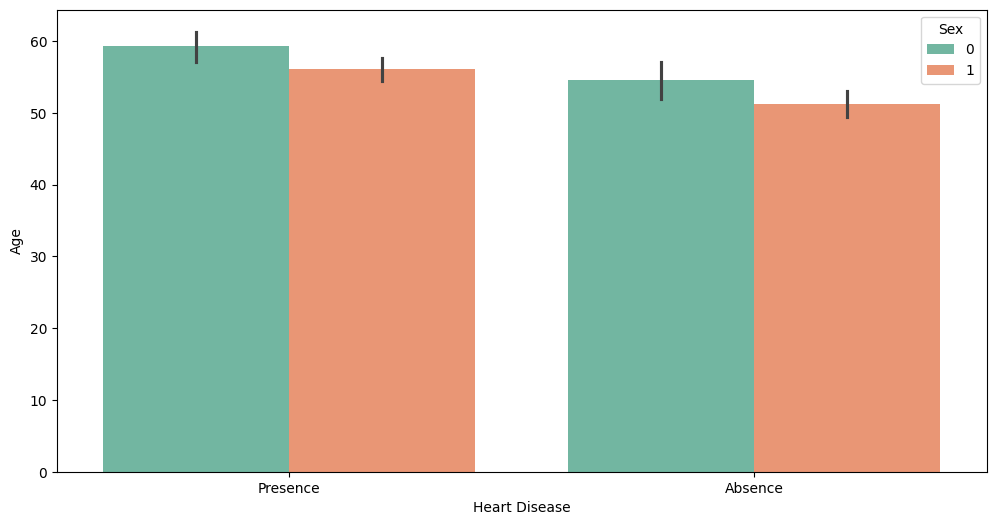

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Heart Disease',y='Age', hue='Sex', palette='Set2')

#### Observation : Female count is prone to have Heart Dieases

In [20]:
chestp=df['Chest pain type'].value_counts().reset_index()
chestp.columns=['type', 'count']

In [21]:
chestp

,type,count
0,4,129
1,3,79
2,2,42
3,1,20


<Axes: xlabel='type', ylabel='count'>

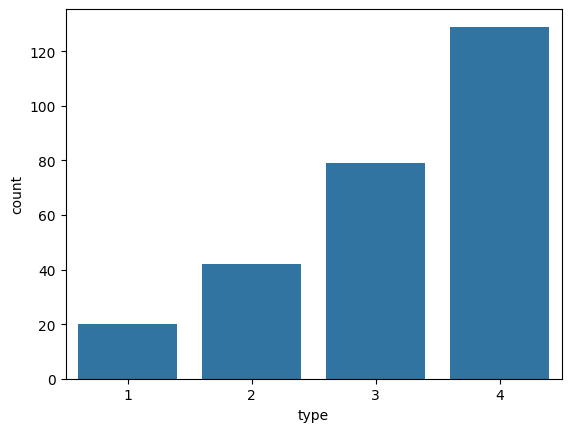

In [24]:
sns.barplot(data=chestp, x='type', y='count')

<Axes: xlabel='Age', ylabel='Cholesterol'>

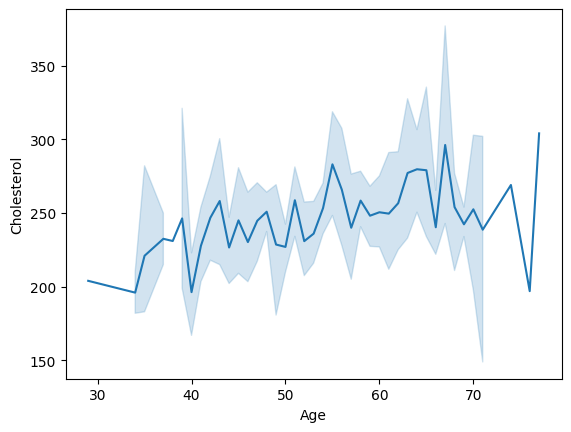

In [22]:
sns.lineplot(x='Age',y='Cholesterol', data=df)

<Axes: xlabel='FBS over 120', ylabel='count'>

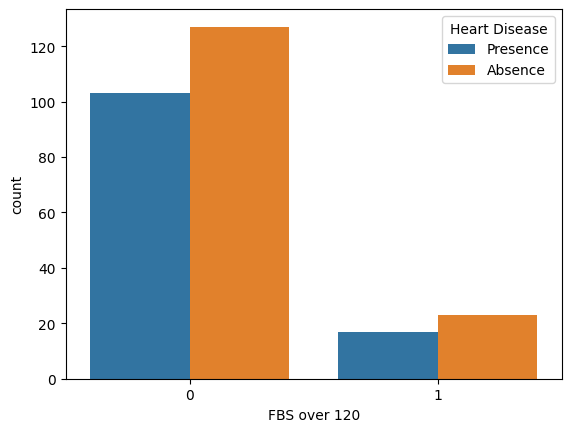

In [23]:
sns.countplot(x='FBS over 120', hue='Heart Disease', data=df)

<Axes: xlabel='Exercise angina', ylabel='count'>

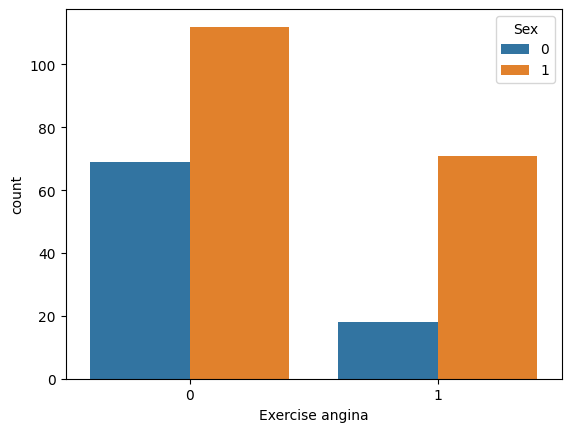

In [27]:
sns.countplot(data=df, x='Exercise angina', hue='Sex')

In [32]:
dfdep=df.groupby('ST depression')['Heart Disease'].value_counts().reset_index(name='counts')

<Axes: xlabel='ST depression', ylabel='counts'>

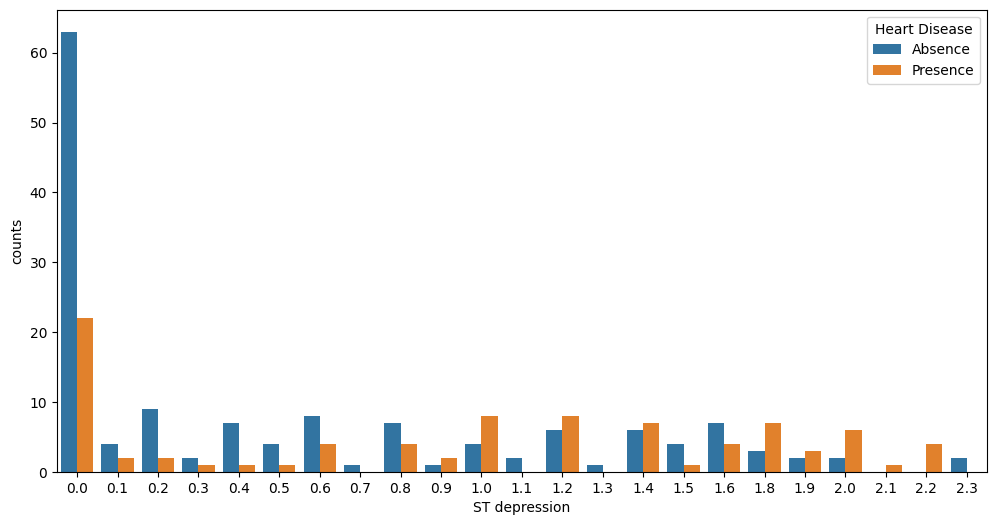

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data=dfdep.head(40), x='ST depression', y='counts', hue='Heart Disease')

<Axes: xlabel='Thallium', ylabel='Heart Disease'>

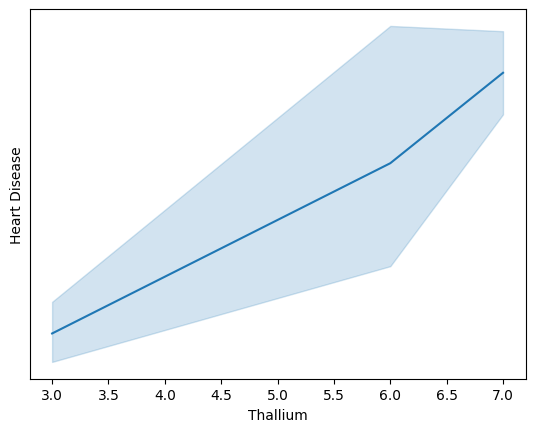

In [40]:
sns.lineplot(x='Thallium', y='Heart Disease', data=df)

In [45]:
df['Heart Disease']=df['Heart Disease'].map({'Absence':0, 'Presence':1}).astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

### Train test split

In [48]:
X=df.drop('Heart Disease', axis=1)

In [49]:
y=df['Heart Disease']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
115,49,0,2,134,271,0,0,162,0,0.0,2,0,3
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7
184,53,1,3,130,246,1,2,173,0,0.0,1,3,3
142,50,1,3,140,233,0,0,163,0,0.6,2,1,7
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3


In [55]:
y_train.head()

115    0
33     1
184    0
142    1
197    0
Name: Heart Disease, dtype: int64

In [56]:
cor=df.corr()

<Axes: >

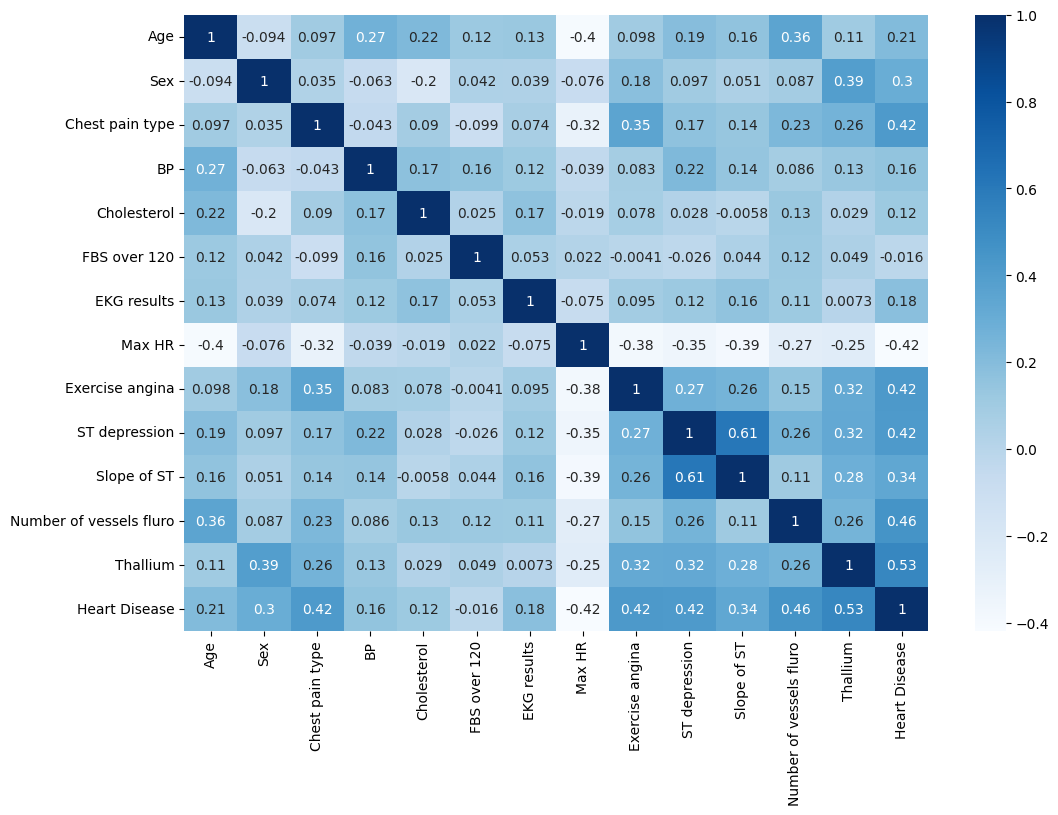

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='Blues')

In [57]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [59]:
sel_features=correlation(X_train, 0.5)
sel_features

{'Slope of ST'}

In [62]:
X_train.drop(columns=sel_features, inplace=True)

In [64]:
from sklearn.feature_selection import SelectKBest, chi2

selectbbest=SelectKBest(score_func=chi2, k=10)

In [65]:
selectbbest.fit(X_train, y_train)

SelectKBest(score_func=<function chi2 at 0x11f9fa340>)